In [39]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('../data/cleaned_energy_data.csv')

In [123]:
#df['year'] = pd.to_datetime(df['year'])

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   country                                   4698 non-null   object        
 1   year                                      4698 non-null   datetime64[ns]
 2   population                                4698 non-null   float64       
 3   life_expectancy                           4698 non-null   float64       
 4   consumption_per_capita                    4698 non-null   float64       
 5   consumption_per_GDP                       4698 non-null   float64       
 6   ppp_2015USD                               4698 non-null   float64       
 7   production_total                          4698 non-null   float64       
 8   production_coal                           4698 non-null   float64       
 9   production_natural_gas        

In [140]:
df.drop(columns = ['production_nuclear', 'consumption_nuclear'], inplace = True)

In [126]:
#df[df['country'] == 'Zambia']

In [30]:
least_developed_countries = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso'
                             'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros',
                             'Congo-Brazzaville', 'Congo-Kinshasa', 'Djibouti', 'Ethiopia',
                             'Gambia, The', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos', 
                             'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
                             'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Rwanda', 'Sao Tome and Principe',
                             'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia', 
                             'Sudan', 'Togo', 'Uganda', 'Tanzania', 'Yemen', 'Zambia'
                            ]

In [141]:
ldc_df = pd.DataFrame(df[df.country.isin(least_developed_countries)])

In [142]:
ldc_df['emissions_total'] = ldc_df['emissions_co2_emissions'] + ldc_df['emissions_coal_and_coke'] + ldc_df['emissions_consumed_natural_gas']+ ldc_df['emissions_petroleum_and_other_liquids']

In [143]:
ldc_df['emissions_per_pop'] = ldc_df['emissions_total'] / ldc_df['population']

In [163]:
ldc_df.groupby(['country', 'year'])['life_expectancy'].mean()

country      year
Afghanistan  1992    51.641
             1993    52.256
             1994    52.842
             1995    53.398
             1996    53.924
                      ...  
Zambia       2014    60.831
             2015    61.737
             2016    62.464
             2017    63.043
             2018    63.510
Name: life_expectancy, Length: 1080, dtype: float64

In [131]:
ldc_df_d = pd.get_dummies(data = ldc_df, drop_first = True)

In [136]:
ldc_df.head()

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,...,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,emissions_total,emissions_per_pop
1,Afghanistan,1970-01-01 00:00:00.000001992,14485.500,51.641,2.159523,1.042253,30.0136,0.016143,0.000158,0.011092,...,0.000,0.0,0.0,0.000,1.704078,0.015551,0.588528,1.10000,3.408157,0.000235
4,Angola,1970-01-01 00:00:00.000001992,12657.400,45.230,6.689229,1.423070,59.4969,1.152349,0.000000,0.021076,...,508.400,0.0,0.0,0.000,5.218203,0.000000,1.118203,4.10000,10.436406,0.000825
13,Bangladesh,1970-01-01 00:00:00.000001992,107984.000,59.618,2.647463,1.624293,176.0050,0.204425,0.000000,0.194071,...,0.000,0.0,0.0,0.000,16.433322,0.336537,10.296785,5.80000,32.866644,0.000304
18,Benin,1970-01-01 00:00:00.000001992,5331.810,54.776,2.124834,0.994890,11.3874,0.012589,0.000000,0.000000,...,2.563,0.0,0.0,0.000,0.800000,0.000000,0.000000,0.80000,1.600000,0.000300
19,Bhutan,1970-01-01 00:00:00.000001992,532.332,54.384,24.728125,9.205295,1.4300,0.016641,0.000053,0.000000,...,0.000,0.0,0.0,1.445,0.122191,0.040931,0.000000,0.08126,0.244382,0.000459


In [133]:
ldc_df_2018 = pd.DataFrame(ldc_df[ldc_df.year == 2018])
ldc_df_2018.mean()

<ipython-input-133-42e0f1134a25>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ldc_df_2018.mean()


country                                     NaN
population                                  NaN
life_expectancy                             NaN
consumption_per_capita                      NaN
consumption_per_GDP                         NaN
ppp_2015USD                                 NaN
production_total                            NaN
production_coal                             NaN
production_natural_gas                      NaN
production_petrolium_and_other_liquids      NaN
production_nuclear_renewables_and_other     NaN
production_renewables_and_other             NaN
consumption_total                           NaN
consumption_coal                            NaN
consumption_natural_gas                     NaN
consumption_petrolium_and_other_liquids     NaN
consumption_nuclear_renewables_and_other    NaN
consumption_renewables_and_other            NaN
imports_crude_oil                           NaN
imports_natural_gas                         NaN
imports_coal                            

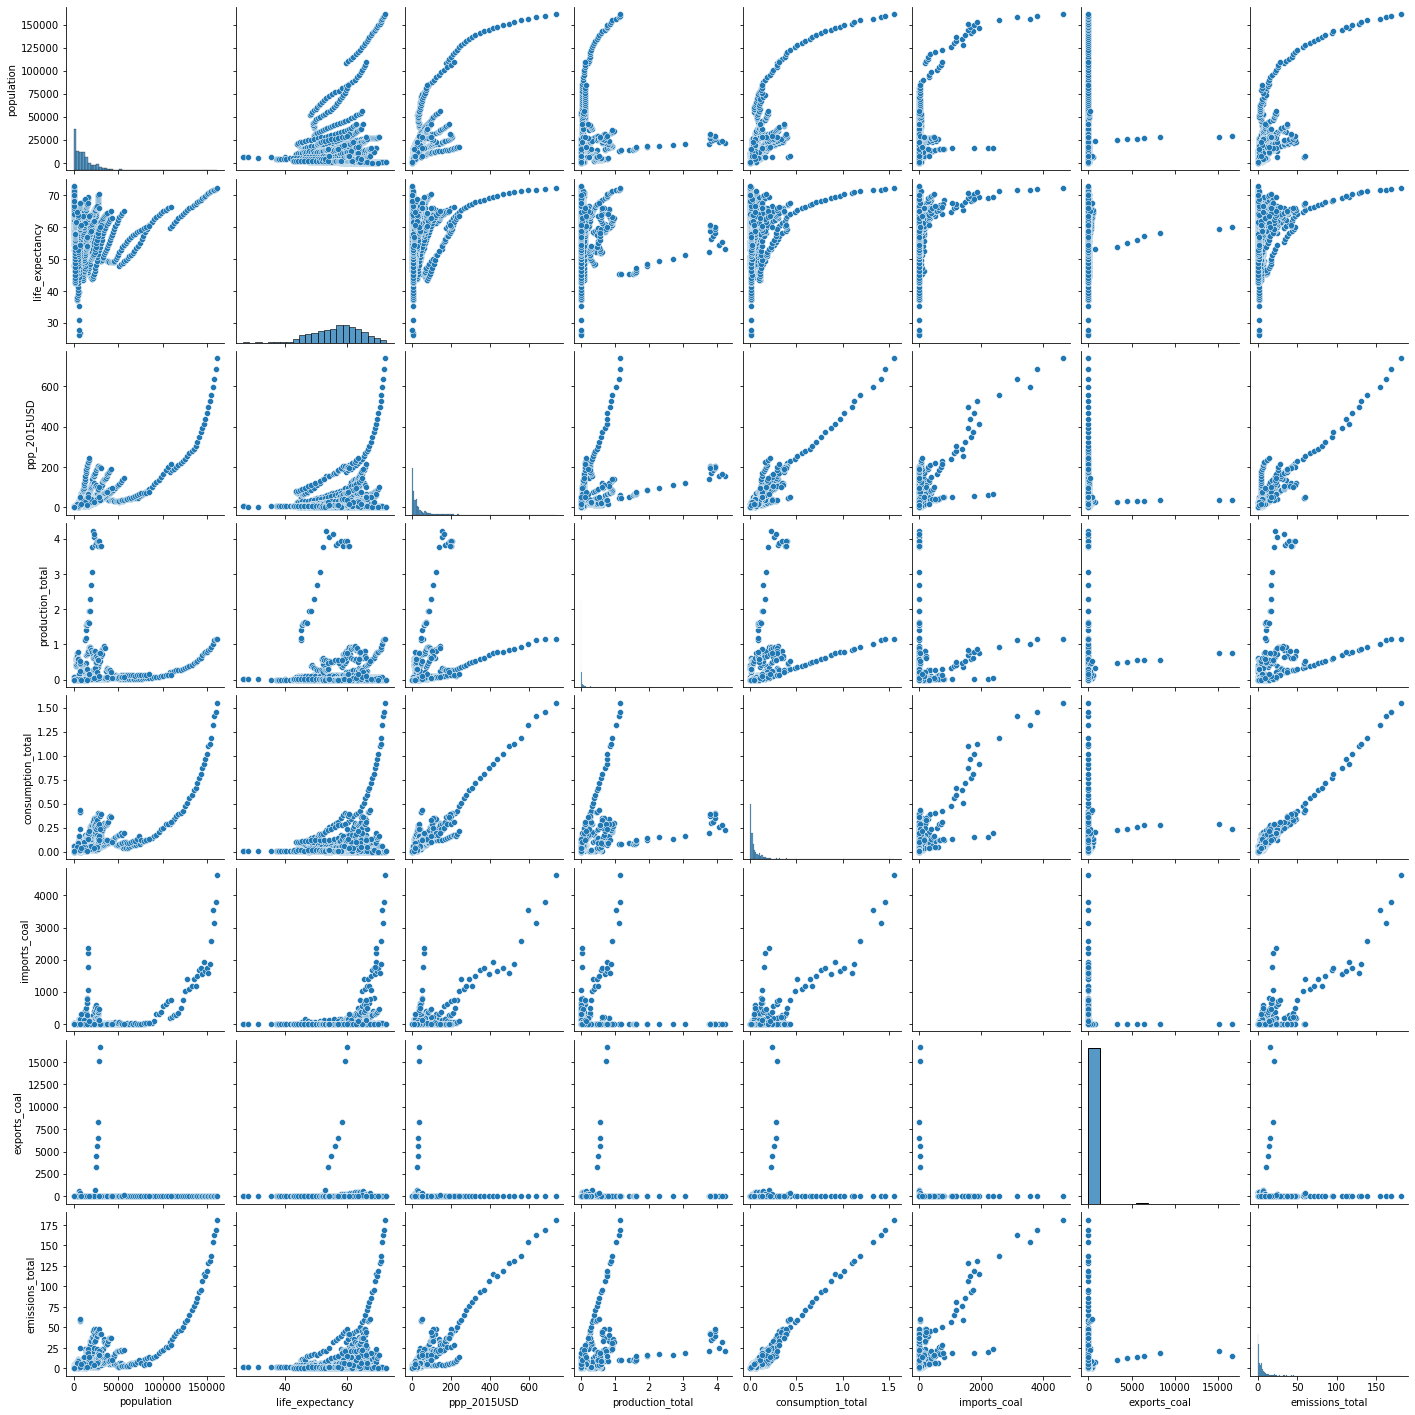

In [103]:
col_ind = [2,3,6,7,13,21,25,31]
features = ldc_df.columns[col_ind]
sns.pairplot(ldc_df, vars = features)

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

data = ldc_df_d
sc = StandardScaler()
data_sc = sc.fit_transform(data)

In [115]:
dbscan = DBSCAN(eps = 1.5, min_samples=5)
dbscan.fit(data_sc)

DBSCAN(eps=1.5)

In [116]:
dbscan.labels_

array([ 0,  1, 38, ..., 36, -1, -1])

In [117]:
ldc_df_d['db_cluster'] = dbscan.labels_

In [118]:
ldc_df_d.groupby('db_cluster').mean()

,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,...,country_Senegal,country_Sierra Leone,country_Solomon Islands,country_Somalia,country_Sudan,country_Tanzania,country_Togo,country_Uganda,country_Yemen,country_Zambia
db_cluster,,,,,,,,,,,,,,,,,,,,,
-1,2010.990000,54645.910060,62.702290,11.025033,3.485519,170.125145,0.863151,0.031004,0.183837,0.588554,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.11,0.03
0,2000.000000,21406.658824,55.833176,1.242310,0.910046,29.570924,0.011300,0.000942,0.005481,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
1,1998.000000,15493.884615,46.353000,6.634509,1.552520,67.207800,1.581672,0.000000,0.021616,1.549671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2,2005.000000,8132.704074,57.617630,5.169431,1.952865,21.280737,0.002368,0.000000,0.000000,0.002343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
3,1998.500000,578.891571,59.683000,30.395341,8.521490,2.117383,0.020838,0.001038,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
4,2003.000000,12687.023043,61.170565,3.337040,1.672565,25.528652,0.001914,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
5,2005.000000,3945.299259,47.055926,1.518479,1.511346,4.010014,0.001142,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
6,2005.000000,10360.178519,49.626444,0.414492,0.314898,15.056040,0.168121,0.000000,0.000000,0.168111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
7,2005.000000,620.628259,60.730444,2.890467,1.101115,1.629310,0.000029,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00


In [65]:
ldc_df_2018.groupby('db_cluster')['country'].value_counts()

db_cluster  country                 
-1          Afghanistan                 1
            Angola                      1
            Bangladesh                  1
            Benin                       1
            Bhutan                      1
            Cambodia                    1
            Congo-Brazzaville           1
            Congo-Kinshasa              1
            Ethiopia                    1
            Laos                        1
            Mozambique                  1
            Nepal                       1
            Senegal                     1
            Sudan                       1
            Tanzania                    1
            Uganda                      1
            Yemen                       1
            Zambia                      1
 0          Central African Republic    1
            Chad                        1
            Comoros                     1
            Djibouti                    1
            Gambia, The                

In [67]:
# making dummy columns for landlocked and nuclear countries
#main_df = pd.read_csv('../data/cleaned_energy_data.csv')

#landlocked = ['Afghanistan', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bhutan',
#              'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad',
#              'Czech Republic','Eswatini', 'Ethiopia', 'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
#              'Lesotho', 'Liechtenstein','Luxembourg', 'Malawi', 'Mali', 'Moldova', 'Mongolia',
#              'Nepal', 'Niger', 'North Macedonia', 'Paraguay','Rwanda', 'San Marino', 'Serbia',
#              'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan','Turkmenistan', 'Uganda',
#              'Uzbekistan', 'Vatican City', 'Zambia', 'Zimbabwe']

#nuclear = ['Argentina', 'Armenia', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
#                     'China', 'Czech Republic', 'Finland', 'France', 'Germany', 'Hungary', 'India',
#                     'Iran', 'Japan', 'Mexico', 'Netherlands', 'Pakistan', 'Romania', 'Russia',
 #                    'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
#                     'Switzerland', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
#                     'United States']

#main_df['is_landlocked'] = main_df['country'].map(lambda x: 1 if x in landlocked else 0)
#main_df['is_nuclear'] = main_df['country'].map(lambda x: 1 if x in nuclear else 0)
#main_df.groupby(['is_nuclear','year']).mean()
#main_df.groupby(['is_landlocked','year']).mean()

population  life_expectancy  consumption_per_capita  \
is_nuclear year                                                           
0          1992   50787.614921        63.302572               59.204598   
           1993   51741.225260        63.380484               60.140985   
           1994   52573.432356        63.513429               60.638849   
           1995   53395.670542        63.675000               61.180111   
           1996   54217.225526        63.897831               61.535757   
           1997   55031.681671        64.112622               63.772470   
           1998   55834.224225        64.317700               64.136197   
           1999   56636.399349        64.575985               63.852058   
           2000   57437.988611        64.845529               67.067007   
           2001   58247.261961        65.139428               65.710525   
           2002   59061.698658        65.411053               67.898014   
           2003   59882.341592        65.715953               68.385647   
           2004   60712.256983        66.103206               70.544439   
           2005   61552.106653        66.437735               72.707451   
           2006   62404.353832        66.811397               73.536708   
           2007   63267.485949        67.190799               73.582845   
           2008   64140.642975        67.616306               73.575950   
           2009   65017.445129        68.040725               70.854384   
           2010   65902.993632        68.448187               72.288579   
           2011   66864.761210        68.842777               71.151920   
           2012   67777.896753        69.220623               73.739047   
           2013   68707.955851        69.593120               72.924834   
           2014   69638.599887        69.947386               72.471892   
           2015   70539.668264        70.248186               72.620211   
           2016   71468.025387        70.554019               72.910352   
           2017   72395.992230        70.817952               73.994046   
           2018   73324.928517        71.054804               73.725109   
1          1992  120042.772267        71.852232              164.305843   
           1993  121579.855867        71.852006              159.518510   
           1994  123063.783467        72.071492              157.744621   
           1995  124522.109367        72.173030              159.930808   
           1996  125966.858267        72.437355              162.260244   
           1997  127390.871000        72.671947              161.613549   
           1998  128790.491800        72.896072              160.762409   
           1999  130173.444833        73.005667              160.040927   
           2000  131539.314467        73.240670              163.074878   
           2001  132864.316300        73.472964              164.142232   
           2002  134174.900333        73.593441              162.805142   
           2003  135472.048067        73.786290              164.202620   
           2004  136769.572133        74.123355              166.153352   
           2005  138071.872667        74.284544              166.647409   
           2006  139397.659400        74.620668              166.132238   
           2007  140718.815500        74.917092              165.375368   
           2008  142032.465867        75.150956              165.181267   
           2009  143323.005833        75.489875              154.391390   
           2010  144596.994600        75.751939              159.824999   
           2011  145838.833133        76.184887              159.528358   
           2012  147074.895267        76.403607              158.182210   
           2013  148300.167733        76.709559              157.716800   
           2014  149517.851267        76.990633              155.053063   
           2015  150646.934433        77.046272              155.370814   
           2016  151836.556567        77.2952

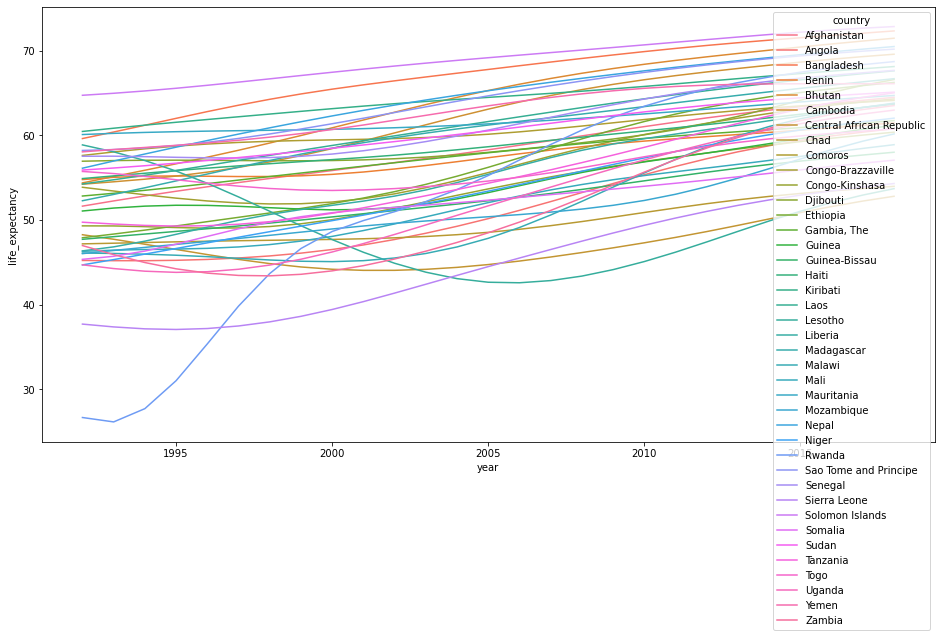

In [161]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = ldc_df, x = 'year', y = 'life_expectancy', hue = 'country');

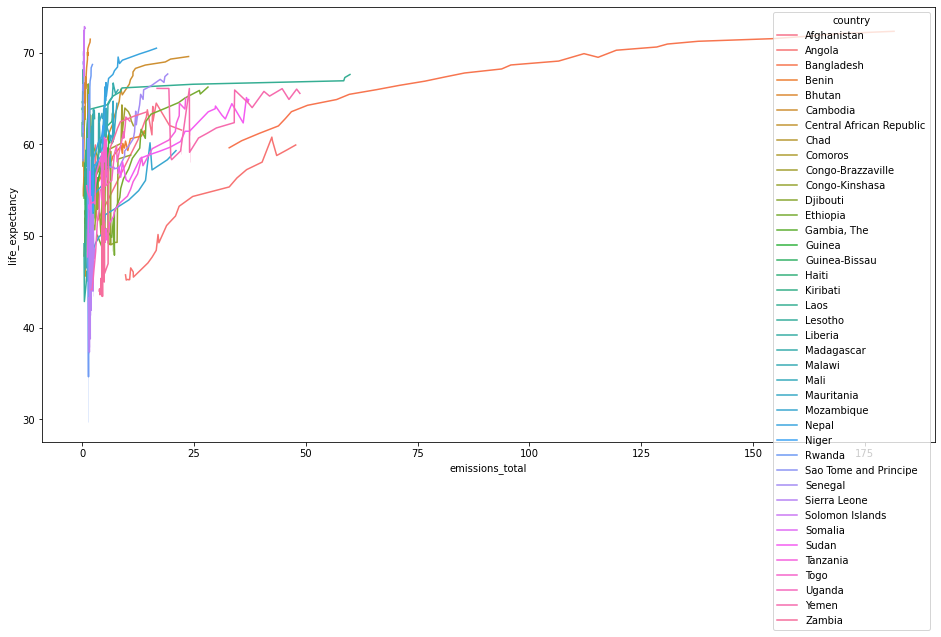

In [172]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = ldc_df, x = 'emissions_total', y = 'life_expectancy', hue = 'country');